In [11]:
import numpy as np
import pandas as pd 
foodfacts=pd.read_csv('en.openfoodfacts.org.products.tsv',  sep='\t')



In [12]:
#clean missing data
variables=foodfacts[['fiber_100g','proteins_100g',
'fat_100g',
'sugars_100g',
'salt_100g',
'sodium_100g',
'additives_n',
'carbohydrates_100g']]
locations=np.where(variables.fiber_100g.notnull() & variables.proteins_100g.notnull() &
                   variables.fat_100g.notnull() & variables.sugars_100g.notnull()  
                    & variables.salt_100g.notnull() &
                   variables.sodium_100g.notnull() & variables.additives_n.notnull() &
                   variables.carbohydrates_100g.notnull()
                   )[0]

variablesnew=variables.loc[locations,:]

In [15]:
#append energy_100g, the subject of interest to variablesnew
variablesnew['energy_100g']=foodfacts.energy_100g
#run linear regression
import statsmodels.formula.api as sm
result=sm.ols(formula="energy_100g ~ fiber_100g+proteins_100g+fat_100g+sugars_100g+salt_100g+sodium_100g+additives_n+carbohydrates_100g",
             data=variablesnew).fit()
result.summary()
#based on this table, salt and sodium are not good candidates because of their high standard error. 
#fiber is not correlated based on its t value.
#plot regression line of 'additives_n','fat_100g','sugars_100g','carbohydrates_100g','proteins_100g'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            energy_100g   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 5.463e+05
Date:                Mon, 30 Oct 2017   Prob (F-statistic):               0.00
Time:                        10:29:50   Log-Likelihood:            -1.2606e+06
No. Observations:              194550   AIC:                         2.521e+06
Df Residuals:                  194541   BIC:                         2.521e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             32.8822      0.756     43.483      0.000      31.400      34.364
fiber_100g          1.807e-09   1.86e-09      0.972      0.331   -1.84e-09    5.45e-09
proteins_100g         15.8413      0.048    330.929      0.000      15.748      15.935
fat_100g              36.2329      0.024   1526.947      0.000      36.186      36.279
sugars_100g            0.1345      0.024      5.508      0.000       0.087       0.182
salt_100g          -1998.4026    467.624     -4.274      0.000   -2914.935   -1081.870
sodium_100g         5076.0925   1187.766      4.274      0.000    2748.100    7404.085
additives_n            0.5250      0.145      3.623      0.000       0.241       0.809
carbohydrates_100g    16.2054      0.016    992.329      0.000      16.173      16.237
==============================================================================
Omnibus:                   330125.563   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6380179765.600
Skew:                          10.515   Prob(JB):                         0.00
Kurtosis:                     889.920   Cond. No.                     6.87e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.87e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

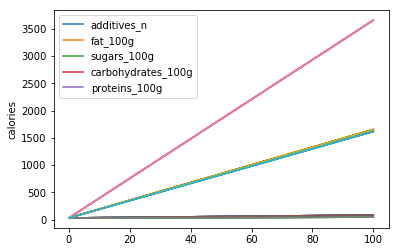

In [17]:
import matplotlib.pyplot as plt
xgrid=np.linspace(0,100,1000)
plt.plot(xgrid,xgrid*result.params['additives_n']+result.params['Intercept'],'-')
plt.plot(xgrid,xgrid*result.params['fat_100g']+result.params['Intercept'],'-')
plt.plot(xgrid,xgrid*result.params['sugars_100g']+result.params['Intercept'],'-')
plt.plot(xgrid,xgrid*result.params['carbohydrates_100g']+result.params['Intercept'],'-')
plt.plot(xgrid,xgrid*result.params['proteins_100g']+result.params['Intercept'],'-')
plt.legend(labels=['additives_n','fat_100g','sugars_100g','carbohydrates_100g','proteins_100g'])
plt.ylabel('calories')
plt.show()

#we can see that fat, sugar, proteins and carbo hydrates both influence positively on calories. Interestingly,
#although the slope is small, number of additives has a positive influence on calories of food.
#It means that high calories food tend to have more additives added.
#Interestingly, the slope on sugar is also very small, although positive. It means that sugar is 
#not a major source that contributes to calories compared with fat,carbohydrates and proteins
